In [11]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
# Step 2: Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


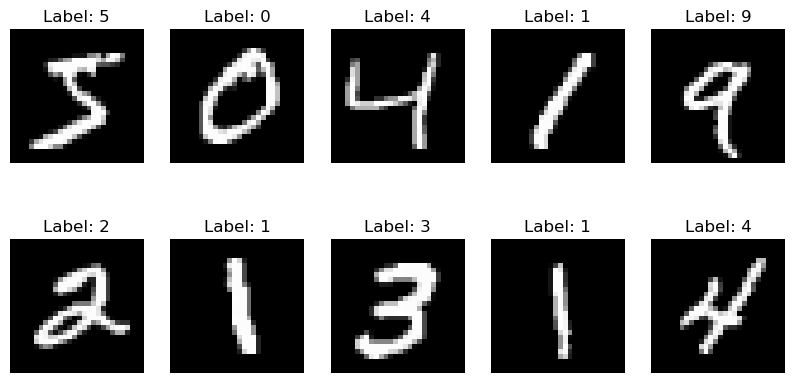

In [13]:
# Step 3: Visualize some digits
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [14]:
# Step 4: Preprocessing
# Normalize pixel values (0–255) → (0–1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [15]:
# Step 5: Build Model (ANN)
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten 28x28 -> 784
    Dense(128, activation='relu'),      # Hidden layer 1
    Dense(64, activation='relu'),       # Hidden layer 2
    Dense(10, activation='softmax')     # Output layer (10 classes)
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\Aditi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Step 6: Train Model
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=10,
                    batch_size=128,
                    verbose=2)


Epoch 1/10
469/469 - 4s - 8ms/step - accuracy: 0.9071 - loss: 0.3273 - val_accuracy: 0.9518 - val_loss: 0.1634
Epoch 2/10
469/469 - 2s - 5ms/step - accuracy: 0.9603 - loss: 0.1353 - val_accuracy: 0.9679 - val_loss: 0.1114
Epoch 3/10
469/469 - 2s - 5ms/step - accuracy: 0.9714 - loss: 0.0946 - val_accuracy: 0.9659 - val_loss: 0.1127
Epoch 4/10
469/469 - 2s - 4ms/step - accuracy: 0.9785 - loss: 0.0718 - val_accuracy: 0.9741 - val_loss: 0.0820
Epoch 5/10
469/469 - 2s - 5ms/step - accuracy: 0.9819 - loss: 0.0586 - val_accuracy: 0.9730 - val_loss: 0.0876
Epoch 6/10
469/469 - 2s - 5ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9766 - val_loss: 0.0725
Epoch 7/10
469/469 - 2s - 4ms/step - accuracy: 0.9884 - loss: 0.0367 - val_accuracy: 0.9767 - val_loss: 0.0770
Epoch 8/10
469/469 - 3s - 6ms/step - accuracy: 0.9904 - loss: 0.0314 - val_accuracy: 0.9781 - val_loss: 0.0708
Epoch 9/10
469/469 - 2s - 4ms/step - accuracy: 0.9923 - loss: 0.0250 - val_accuracy: 0.9737 - val_loss: 0.0861
E

In [17]:
# Step 7: Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9780


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


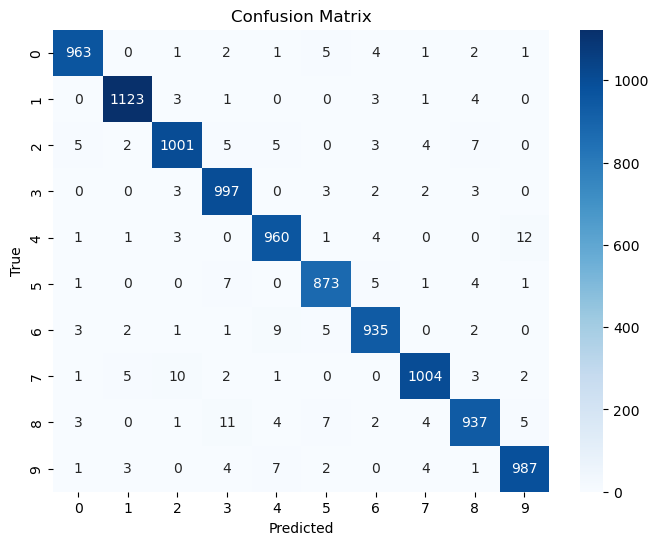

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
# Step 8: Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred_classes))


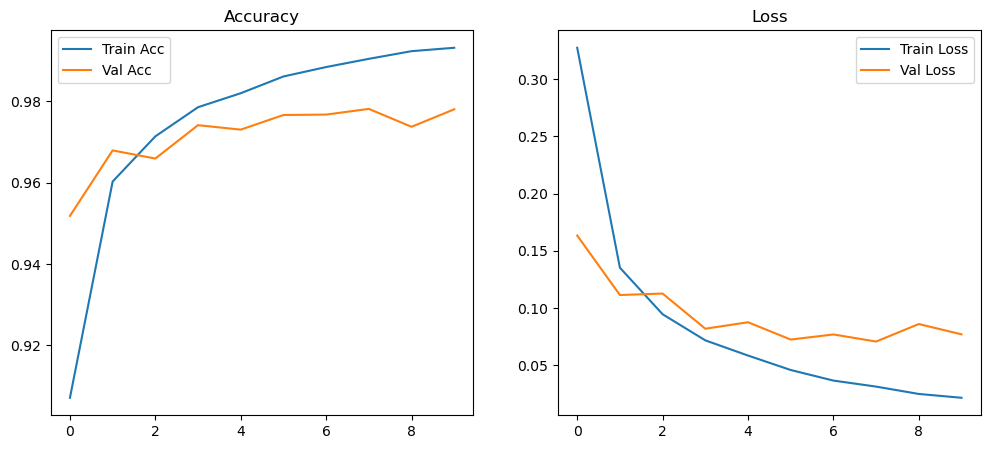

In [19]:
# Step 9: Plot Training Accuracy & Loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()
